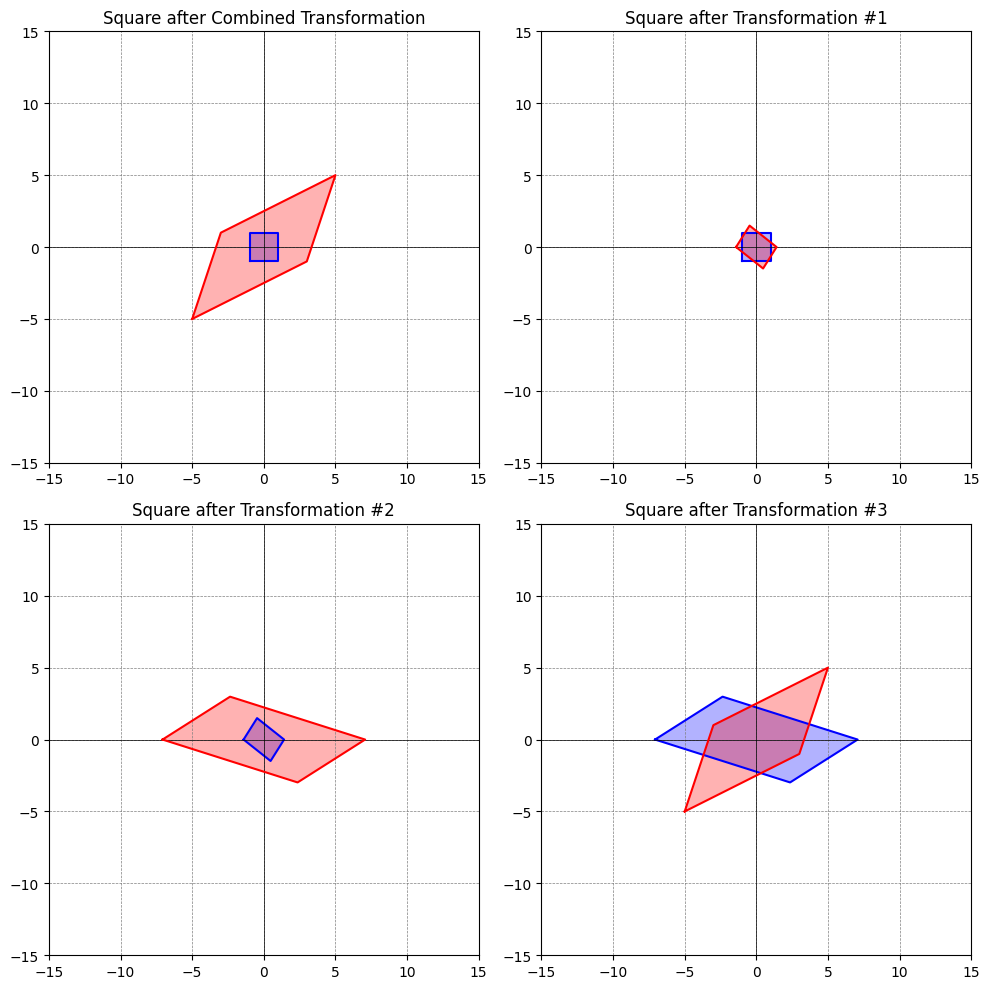

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Plot initial coordinate axis and unit square
def plot_square(ax, square):
    ax.plot(square[0, :], square[1, :], 'b')
    ax.fill(square[0, :], square[1, :], 'blue', alpha=0.3)
    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Apply transformation and plot
def plot_transformed_square(ax, matrix, square):
    transformed_square = np.dot(matrix, square)
    ax.plot(transformed_square[0, :], transformed_square[1, :], 'r')
    ax.fill(transformed_square[0, :], transformed_square[1, :], 'red', alpha=0.3)
    return transformed_square

# Initialize unit square
square = np.array([[-1, -1], [-1, 1], [1, 1], [1, -1], [-1, -1]]).T

# Inputs for 3 2x2 matrices
matrix1 = np.array([[ 0.94280904, 0.47140452], [-0.74535599, 0.74535599]])  # Replace with your matrix
matrix2 = np.array([[5, 0], [0, 2]])  # Replace with your matrix
matrix3 = np.array([[ 0.70710678, -0.4472136 ],[ 0.70710678, 0.89442719]])  # Replace with your matrix
matrices = [matrix1, matrix2, matrix3]

# Calculate product of all three matrices
product_matrix = np.dot(matrix3, np.dot(matrix2, matrix1))

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot combined transformation as the first graph
plot_square(axs[0, 0], square)
square_combined = plot_transformed_square(axs[0, 0], product_matrix, square)
axs[0, 0].set_title('Square after Combined Transformation')

# Plot individual transformations as the remaining graphs
for i, (matrix, ax) in enumerate(zip(matrices, axs.flat[1:]), start=1):
    plot_square(ax, square)
    square = plot_transformed_square(ax, matrix, square)
    ax.set_title(f'Square after Transformation #{i}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()


In [2]:
import numpy as np

In [9]:
# Define your square matrix
A = np.array([[4, 1, 4], [2, 3, 8], [3, 8, 6]])

# Perform the eigen decomposition
eigenvalues, V = np.linalg.eig(A)
eigenvalues

array([13.9799417 ,  2.75664948, -3.73659118])

In [10]:
V

array([[ 0.35016458,  0.93859669, -0.24931089],
       [ 0.59241971, -0.26004959, -0.70916212],
       [ 0.72555059, -0.22673877,  0.65949463]])

In [11]:
# Create the diagonal matrix of eigenvalues
Lambda = np.diag(eigenvalues)
Lambda

array([[13.9799417 ,  0.        ,  0.        ],
       [ 0.        ,  2.75664948,  0.        ],
       [ 0.        ,  0.        , -3.73659118]])

In [12]:
# Compute the inverse of V
V_inv = np.linalg.inv(V)
V_inv

array([[ 0.33923114,  0.57421025,  0.74569549],
       [ 0.92412349, -0.42041432, -0.10272693],
       [-0.05548904, -0.77626532,  0.66060889]])

In [13]:
# Verify that A = VΛV^(-1)
A_reconstructed = np.dot(V, np.dot(Lambda, V_inv))
A_reconstructed

array([[4., 1., 4.],
       [2., 3., 8.],
       [3., 8., 6.]])